In [2]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(3)
print(circ)

     
q_0: 
     
q_1: 
     
q_2: 
     


In [23]:
from qiskit import QuantumRegister

qr = QuantumRegister(3, name='qr')
print(qr)

QuantumRegister(3, 'qr')


In [24]:
qr2=QuantumRegister(2, 'ancilla')
circ2=QuantumCircuit(qr,qr2)
print(circ2)

           
     qr_0: 
           
     qr_1: 
           
     qr_2: 
           
ancilla_0: 
           
ancilla_1: 
           


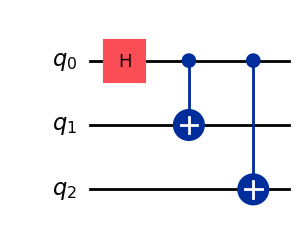

In [25]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)
circ.draw('mpl')

In [26]:
from qiskit.quantum_info import Statevector

state = Statevector.from_int(0,2**3)

state = state.evolve(circ)

state.draw('latex')


<IPython.core.display.Latex object>

In [27]:
from qiskit.visualization import array_to_latex
array_to_latex(state)

<IPython.core.display.Latex object>

In [28]:
from qiskit.quantum_info import Operator
import sympy as sp 

U = Operator(circ)
M = sp.Matrix(U.data)
print(M)

Matrix([[0.707106781186547, 0.707106781186547, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.707106781186547, -0.707106781186547], [0, 0, 0.707106781186547, 0.707106781186547, 0, 0, 0, 0], [0, 0, 0, 0, 0.707106781186547, -0.707106781186547, 0, 0], [0, 0, 0, 0, 0.707106781186547, 0.707106781186547, 0, 0], [0, 0, 0.707106781186547, -0.707106781186547, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.707106781186547, 0.707106781186547], [0.707106781186547, -0.707106781186547, 0, 0, 0, 0, 0, 0]])


In [29]:
from qiskit import ClassicalRegister
qr3 = QuantumRegister(3,'qubits')
qr4 = QuantumRegister(2, 'ancilla')
cr= ClassicalRegister(2,'meas')

circ3 = QuantumCircuit(qr3, qr4, cr)
print(circ3)


           
 qubits_0: 
           
 qubits_1: 
           
 qubits_2: 
           
ancilla_0: 
           
ancilla_1: 
           
   meas: 2/
           


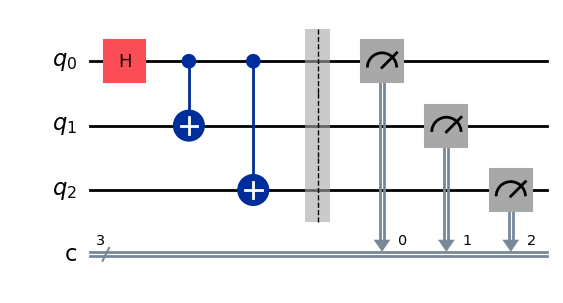

In [30]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))

meas.measure(range(3),range(3))

qc = meas.compose(circ, range(3), front=True)

qc.draw('mpl')

In [31]:
from qiskit import transpile

from qiskit_aer import AerSimulator

backend = AerSimulator()

qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)

result_sim = job_sim.result()

In [32]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'111': 513, '000': 511}


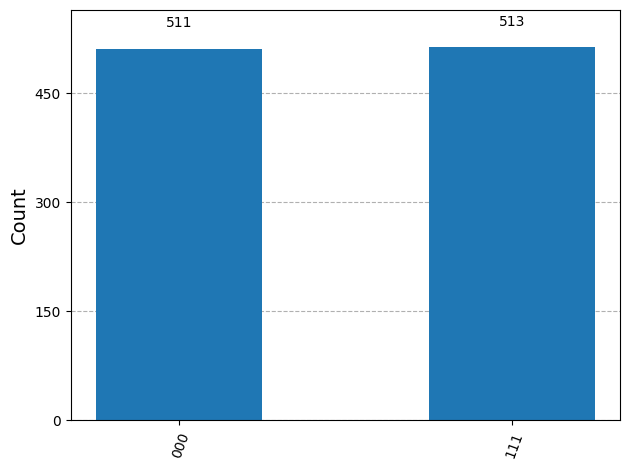

In [33]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [34]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
print(service.backends())

C:\Users\Adeesh\AppData\Local\Temp\ipykernel_18820\1692960373.py:2: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


KeyboardInterrupt: 

In [ ]:
backend = service.least_busy(operational=True, min_num_qubits=5)

In [ ]:
print(                                 
    f"Name: {backend.name}\n"
    f"Version: {backend.version}\n"
    f"No. of qubits: {backend.num_qubits}\n"
)

Name: ibm_brisbane
Version: 2
No. of qubits: 127



In [ ]:
qc_compiled = transpile(qc, backend, optimization_level=2)

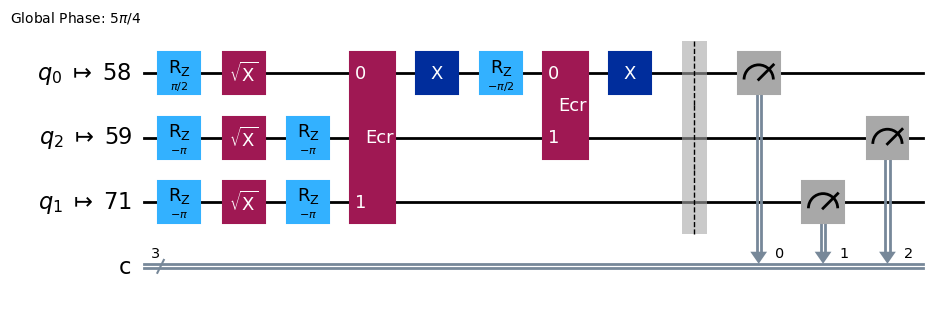

In [ ]:
qc_compiled.draw('mpl')

In [ ]:
from qiskit_ibm_runtime import Sampler
sampler = Sampler(mode=backend)
job = sampler.run([qc_compiled],shots=1024)

c:\Users\Adeesh\miniconda3\envs\soc\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:1129: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


In [35]:
result = job.result()
pub_result = result[0]
print(pub_result.data.c.get_counts())

{'010': 9, '000': 506, '111': 481, '001': 3, '110': 5, '011': 7, '100': 8, '101': 5}


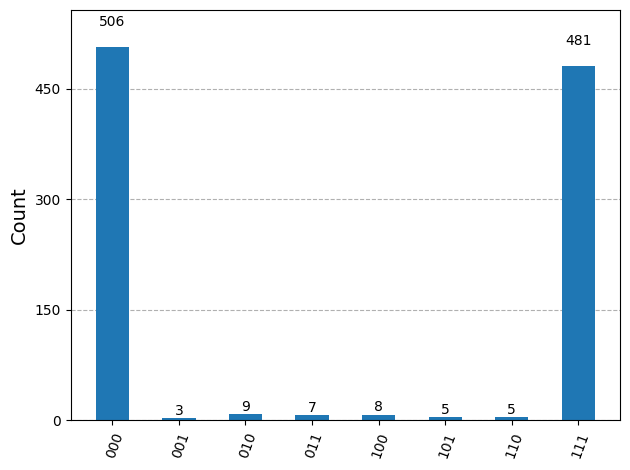

In [36]:
counts = pub_result.data.c.get_counts()
plot_histogram(counts)

In [37]:
from qiskit_aer.noise import NoiseModel
backend.name

'aer_simulator'

In [39]:
noise_model = NoiseModel.from_backend(backend)

backend = AerSimulator(noise_model=noise_model)

qc_compiled = transpile(qc, backend)

job_sim = backend.run(qc_compiled, shots=1024)

result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)

print(counts)

{'111': 528, '000': 496}


c:\Users\Adeesh\miniconda3\envs\soc\Lib\site-packages\qiskit_aer\noise\noise_model.py:376: UserWarning: Qiskit backend AerSimulator('aer_simulator') has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


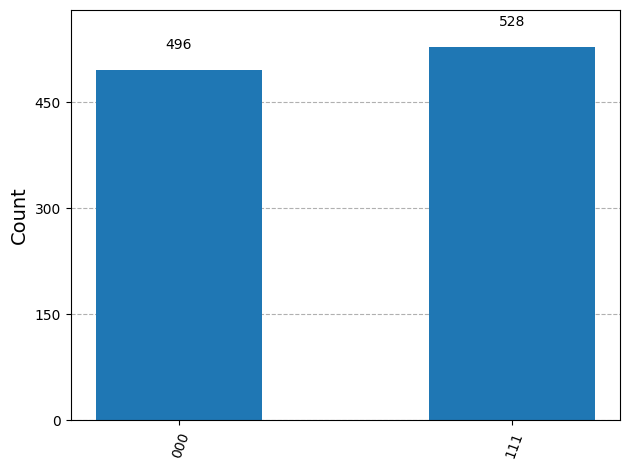

In [40]:
plot_histogram(counts)

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService

print(QiskitRuntimeService.saved_accounts())


{'default-ibm-quantum': {'channel': 'ibm_quantum', 'url': 'https://auth.quantum.ibm.com/api', 'token': 'ad006b61b4cf84491af93256f425f8160695051140beb2d2e6a859f542bdd0e72d34bbe4d2b404280b39e2323e2188d30ea6cf1b3fda8311c50e00789eb16b44', 'verify': True, 'private_endpoint': False}}
